# Hello IMDB Movie Reviews Binary Classifier

Classify Movie Reviews as Positive or Negative

In [1]:
# Prerequisites
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers

### Get data from IMDB Dataset

In [2]:
from tensorflow.keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

```num_words=10000``` means to only keep the top 10,000 most frequently occurring words in the training data. Discard rare words to keep size manageable.

In [3]:
print(f"training data size: {train_data.shape}, test data size {test_data.shape}")

training data size: (25000,), test data size (25000,)


In [4]:
# Check max word index
print(max([max(sequence) for sequence in train_data]))

9999


Decoding reviews from word index to text

In [5]:
word_index = imdb.get_word_index()    # Dictionary mapping
# Reverse the index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# indices are offset by 3 to words as 0, 1, and 2 are reserved indices for “padding,”
# “start of sequence,” and “unknown.”
decoded_review_0 = " ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])
print("First review: ", decoded_review_0)

First review:  ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

### Prepare Data

Multi-Hot Encode the reviews to 10,000-dimensional vectors

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.

    return results

In [7]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
print(f"Training data shape: {X_train.shape}, test data shape {X_test.shape}")

Training data shape: (25000, 10000), test data shape (25000, 10000)


Vectorize Labels

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Build the ANN Model with Keras

In [10]:
# Construct model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])


### Validate model

Extract samples for validation set

In [11]:
# Use 10,000 samples from training data for validation
X_val = X_train[:10000]
X_train_partial = X_train[10000:]
y_val = y_train[:10000]
y_train_partial = y_train[10000:]

Fit the model

In [12]:
history = model.fit(X_train_partial, y_train_partial,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7002 - loss: 0.5999 - val_accuracy: 0.8547 - val_loss: 0.4048
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8943 - loss: 0.3374 - val_accuracy: 0.8848 - val_loss: 0.3130
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9237 - loss: 0.2455 - val_accuracy: 0.8891 - val_loss: 0.2831
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9373 - loss: 0.1965 - val_accuracy: 0.8766 - val_loss: 0.3023
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9465 - loss: 0.1624 - val_accuracy: 0.8823 - val_loss: 0.2899
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9550 - loss: 0.1420 - val_accuracy: 0.8832 - val_loss: 0.2899
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9675 - loss: 0.1131 - val_accuracy: 0.8864 - val_loss: 0.2933
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9726 - loss: 0.0969 - val_accuracy: 0.8845 - val_loss

Plot training and validation history

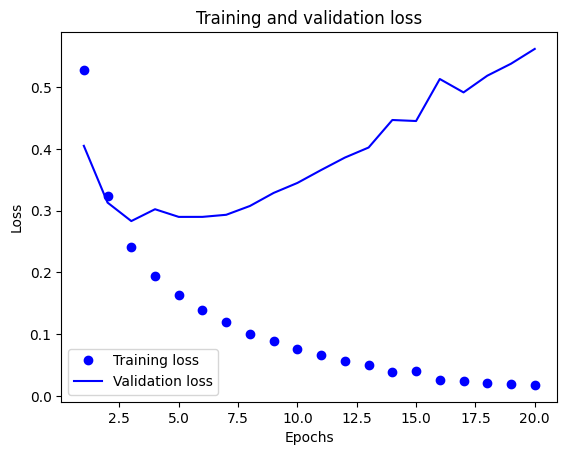

In [13]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

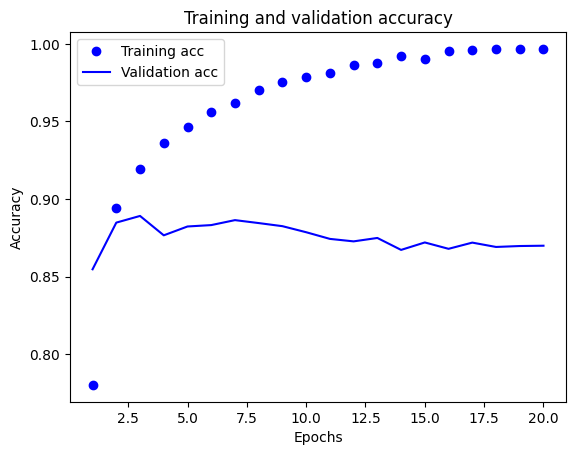

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Overfitting after epoch 4

### Train with full training set and evaluate with test set

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7354 - loss: 0.5650
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9016 - loss: 0.2924
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9270 - loss: 0.2179
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9388 - loss: 0.1805
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.8854 - loss: 0.2851


In [16]:
print(f"Test loss: {results[0]:.3f}, test accuracy: {results[1]:.3f}")

Test loss: 0.284, test accuracy: 0.886


### Predictions

In [17]:
predictions = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step


In [18]:
print(f"Highest confidence prediction: ", np.max(predictions))
print(f"Lowest confidence prediction: ", np.min(predictions))
print(f"Median confidence prediction: ", np.median(predictions))


Highest confidence prediction:  0.9999999
Lowest confidence prediction:  2.2806507e-08
Median confidence prediction:  0.458986
